# 🌟 Exploratory Data Analysis (EDA)

Welcome to our **Exploratory Data Analysis (EDA)** journey! This notebook dives into the dataset to uncover hidden patterns, understand customer behavior, track revenue trends, and reveal insights that can drive smarter business decisions.  

We’ll explore the data step by step, starting with a high-level overview and gradually zooming into customers, products, time patterns, and geographic trends. Expect to see both **visual and statistical insights**, all aimed at telling the story behind the numbers.

---

## 🗂 Structure of the Analysis

### 1. Dataset Overview
We start by getting to know the dataset:
- **Data types & missing values:** Understanding the building blocks of our data and spotting gaps.  
- **Statistical summary:** A quick peek at the numbers—averages, spread, and distributions that set the stage for deeper analysis.

---

### 2. Revenue Analysis
Let’s see how money flows in the business:
- **Monthly trends:** Tracking revenue over time to spot growth, dips, or seasonal patterns.  
- **Distribution:** Looking at how revenue is spread across transactions and customers.

---

### 3. Customer Analysis
Customers are the heart of any business:
- **Aggregation:** Measuring total revenue, purchase frequency, and average order value per customer.  
- **Segmentation:** Grouping customers based on behavior to understand who drives the most value.

---

### 4. Geographic Analysis
Location matters! We’ll map out:
- Where customers are,  
- Which regions generate the most revenue,  
- And potential areas for growth.

---

### 5. Product Analysis
Not all products are created equal:
- Identifying top performers and underperformers,  
- Understanding repeat purchases,  
- And exploring overall product diversity.

---

### 6. Time-Based Patterns
Timing is everything:
- **Day of the week:** When do customers shop the most?  
- **Hourly trends:** Are there peak hours we should know about?

---

### 7. Correlation Analysis
Numbers often talk to each other:
- Exploring relationships between variables to uncover trends and insights that may not be obvious at first glance.

---

### 8. Key Findings Summary
Wrapping it all up:
- Highlighting the **main insights**,  
- Telling the story behind the data,  
- And providing takeaways to guide business strategy and further analysis.

---

📊 *By the end of this notebook, we aim to transform raw data into actionable insights, setting the foundation for advanced modeling like Customer Lifetime Value (CLV) prediction and churn analysis.*


SETUP AND IMPORTS                               
----------------------------------------------------------------------------

In [32]:
import sys
import os

# Get project root (parent of this notebook's folder)
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(project_root)


In [37]:
from src.analysis_utils import get_product_details,analyze_product_trend,print_business_summary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
import os

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Connect to database
cwd = os.getcwd()
pcwd = os.path.dirname(cwd)
DB_PATH = os.path.join(pcwd, 'db', 'retail.db')
conn = sqlite3.connect(DB_PATH)

print("✅ Libraries loaded and database connected")

✅ Libraries loaded and database connected


## DATASET OVERVIEW


In [27]:

# Load data
df = pd.read_sql("SELECT * FROM transactions", conn)
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date Range: {df['invoice_date'].min().date()} to {df['invoice_date'].max().date()}")
print(f"Time Span: {(df['invoice_date'].max() - df['invoice_date'].min()).days} days")
print("="*60)


Dataset Shape: 762,556 rows × 13 columns
Date Range: 2009-12-01 to 2011-12-09
Time Span: 738 days


In [10]:
print_business_summary(df)

📊 BUSINESS SUMMARY

📅 Time Period:
   From: 2009-12-01
   To: 2011-12-09
   Duration: 738 days

💰 Revenue Metrics:
   Total Revenue: $10,008,863.47
   Avg Transaction Value: $13.13
   Median Transaction Value: $10.50

👥 Customer Metrics:
   Total Customers: 5,720
   Avg Revenue per Customer: $1,749.80
   Avg Orders per Customer: 5.96

📦 Order Metrics:
   Total Orders: 34,111
   Total Items Sold: 6,303,316
   Unique Products: 4,604

🌍 Geographic Coverage:
   Countries Served: 41
   Top Country: United Kingdom



Data types and missing values

In [4]:
print("\nData Info:")
df.info()

print("\n" + "="*60)
print("Missing Values:")
missing = df.isnull().sum()
missing = missing[missing > 0]
if len(missing) == 0:
    print("✅ No missing values!")
else:
    print(missing)

print("\n" + "="*60)
print("Sample Data:")
df.head()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762556 entries, 0 to 762555
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    762556 non-null  int64         
 1   stock_code    762556 non-null  object        
 2   description   762556 non-null  object        
 3   quantity      762556 non-null  int64         
 4   invoice_date  762556 non-null  datetime64[ns]
 5   unit_price    762556 non-null  float64       
 6   customer_id   762556 non-null  int64         
 7   country       762556 non-null  object        
 8   total_price   762556 non-null  float64       
 9   year          762556 non-null  int64         
 10  month         762556 non-null  int64         
 11  year_month    762556 non-null  object        
 12  day_of_week   762556 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 75.6+ MB

Missing Values:
✅ No missing 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,year,month,year_month,day_of_week
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,2009-12,Tuesday
1,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6,2009,12,2009-12,Tuesday
2,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,2009-12,Tuesday
3,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.5,2009,12,2009-12,Tuesday
4,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.6,2009,12,2009-12,Tuesday


Statistical summary

In [5]:
print("\nNumerical Features Summary:")
print(df[['quantity', 'unit_price', 'total_price']].describe())
print("\n" + "="*60)
print("\nCategorical Features Summary:")
print(df[['stock_code', 'country']].describe())


Numerical Features Summary:
            quantity     unit_price    total_price
count  762556.000000  762556.000000  762556.000000
mean        8.266037       2.866816      13.125414
std        12.991050       3.093688      11.214322
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.250000
50%         4.000000       1.950000      10.500000
75%        12.000000       3.750000      17.700000
max      2000.000000      59.950000      63.000000


Categorical Features Summary:
       stock_code         country
count      762556          762556
unique       4604              41
top        85123A  United Kingdom
freq         4111          691541


REVENUE ANALYSIS 
----------------------------------------------------------------------------

### 1 - MONTHLY TRENDS

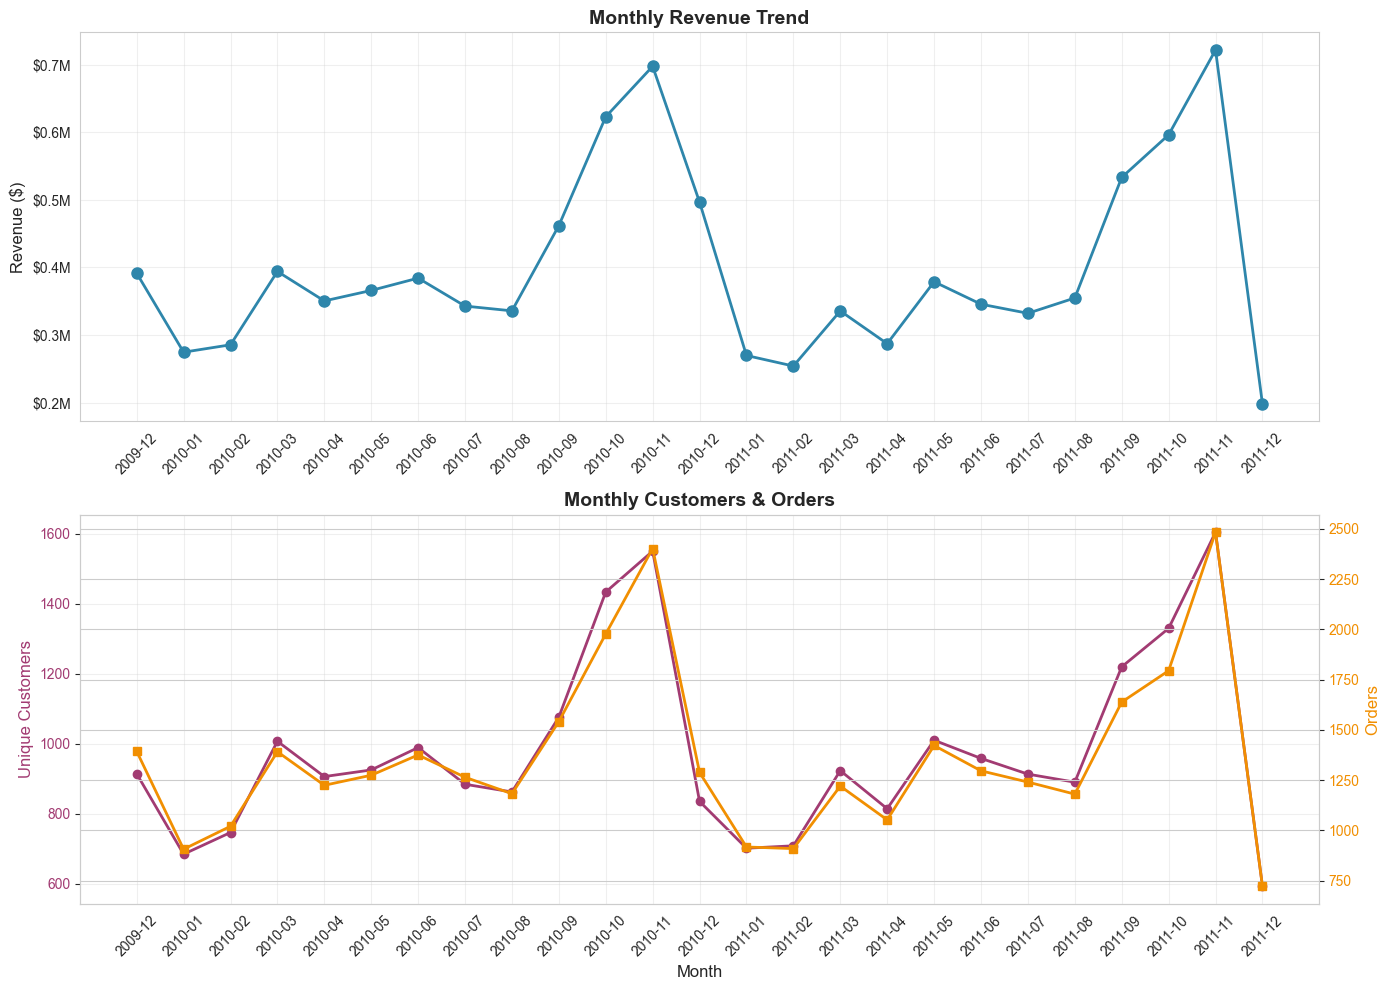


📊 Key Insights:
• Peak Revenue Month: 2011-11
• Peak Revenue Amount: $721,574.36
• Average Monthly Revenue: $400,354.54
• Revenue Growth: -49.4%


In [6]:
# Monthly revenue trend
monthly_revenue = df.groupby(df['invoice_date'].dt.to_period('M')).agg({
    'total_price': 'sum',
    'customer_id': 'nunique',
    'invoice_no': 'nunique'
}).reset_index()
# Rename columns for clarity
monthly_revenue.columns = ['Month', 'Revenue', 'Unique_Customers', 'Orders']
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Revenue trend
axes[0].plot(monthly_revenue['Month'], monthly_revenue['Revenue'], 
             marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue ($)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Format y-axis

axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Customers & Orders trend
ax2 = axes[1]
ax2.plot(monthly_revenue['Month'], monthly_revenue['Unique_Customers'], 
         marker='o', linewidth=2, label='Unique Customers', color='#A23B72')
ax2.set_ylabel('Unique Customers', fontsize=12, color='#A23B72')
ax2.tick_params(axis='y', labelcolor='#A23B72')

ax3 = ax2.twinx()
ax3.plot(monthly_revenue['Month'], monthly_revenue['Orders'], 
         marker='s', linewidth=2, label='Orders', color='#F18F01')
ax3.set_ylabel('Orders', fontsize=12, color='#F18F01')
ax3.tick_params(axis='y', labelcolor='#F18F01')

ax2.set_title('Monthly Customers & Orders', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"• Peak Revenue Month: {monthly_revenue.loc[monthly_revenue['Revenue'].idxmax(), 'Month']}")
print(f"• Peak Revenue Amount: ${monthly_revenue['Revenue'].max():,.2f}")
print(f"• Average Monthly Revenue: ${monthly_revenue['Revenue'].mean():,.2f}")
print(f"• Revenue Growth: {((monthly_revenue['Revenue'].iloc[-1] / monthly_revenue['Revenue'].iloc[0]) - 1) * 100:.1f}%")

### 2 - DISTRIBUTION

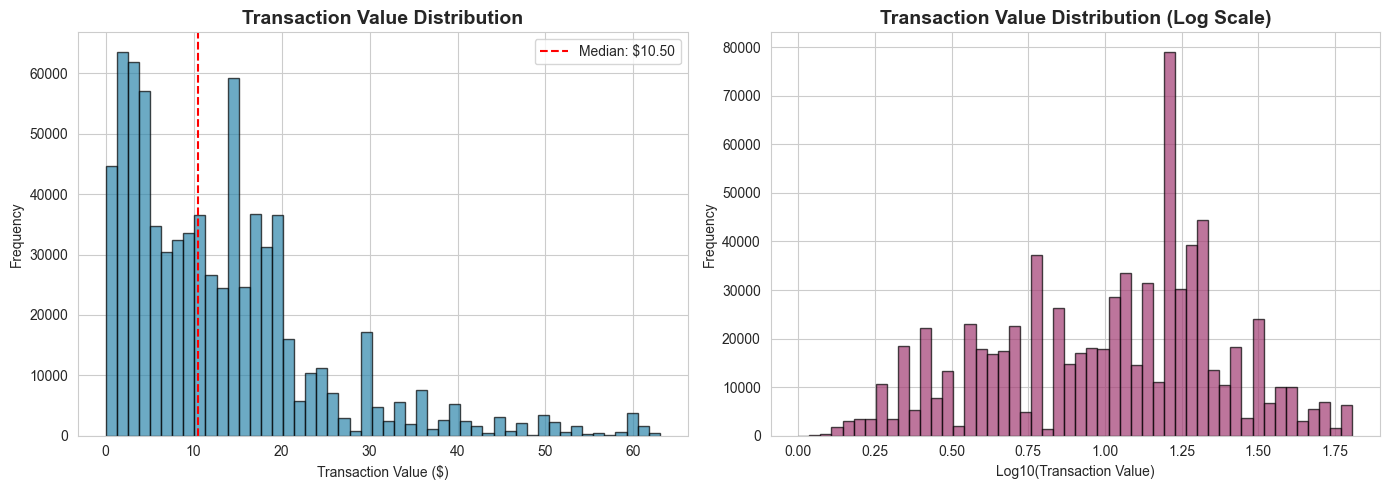


 Revenue Distribution:
• Median Transaction: $10.50
• Mean Transaction:   $13.13
• 75th Percentile:    $17.70
• 95th Percentile:    $35.40


In [26]:
# Revenue distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Transaction value distribution
axes[0].hist(df['total_price'], bins=50, edgecolor='black', alpha=0.7, color='#2E86AB')
axes[0].set_title('Transaction Value Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Transaction Value ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['total_price'].median(), color='red', linestyle='--', 
                label=f'Median: ${df["total_price"].median():.2f}')
axes[0].legend()

# Apply base-10 logarithm to total_price (+1 to handle zeros)
# This compresses large price values for clearer visualization and reduces skewness in the histogram
# Log scale for better visibility
axes[1].hist(np.log10(df['total_price'] + 1), bins=50, edgecolor='black', alpha=0.7, color='#A23B72')
axes[1].set_title('Transaction Value Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Log10(Transaction Value)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n Revenue Distribution:")
print(f"• Median Transaction: ${df['total_price'].median():.2f}")
print(f"• Mean Transaction:   ${df['total_price'].mean():.2f}")
print(f"• 75th Percentile:    ${df['total_price'].quantile(0.75):.2f}")
print(f"• 95th Percentile:    ${df['total_price'].quantile(0.95):.2f}")



### - TOP 20 MOST FREQUENTLY PURCHASED PRODUCTS 

In [20]:
print("="*80)
print(" TOP 20 MOST FREQUENTLY PURCHASED PRODUCTS (By Transaction Count)")
print("="*80)

product_frequency = df.groupby(['stock_code', 'description']).agg({
    'invoice_no': 'nunique',   # Number of unique orders
    'quantity': 'sum',         # Total quantity sold
    'total_price': 'sum'       # Total revenue
}).reset_index()

product_frequency.columns = ['StockCode', 'Description', 'NumOrders', 'TotalQuantity', 'TotalRevenue']
product_frequency = product_frequency.sort_values('NumOrders', ascending=False)

# Display top 20
top_20_frequent = product_frequency.head(20)
print("\nTop 20 Products (ordered by frequency):")
print("-" * 80)
for idx, row in top_20_frequent.iterrows():
    print(f"{row['StockCode']:10} | {row['Description'][:45]:45} | Orders: {row['NumOrders']:>5} | Qty: {row['TotalQuantity']:>7,.0f} | Revenue: ${row['TotalRevenue']:>10,.2f}")


 TOP 20 MOST FREQUENTLY PURCHASED PRODUCTS (By Transaction Count)

Top 20 Products (ordered by frequency):
--------------------------------------------------------------------------------
85123A     | WHITE HANGING HEART T-LIGHT HOLDER            | Orders:  3840 | Qty:  26,386 | Revenue: $ 77,392.44
22423      | REGENCY CAKESTAND 3 TIER                      | Orders:  2330 | Qty:   4,888 | Revenue: $ 62,381.02
84879      | ASSORTED COLOUR BIRD ORNAMENT                 | Orders:  2312 | Qty:  32,904 | Revenue: $ 55,490.64
85099B     | JUMBO BAG RED RETROSPOT                       | Orders:  2217 | Qty:  22,488 | Revenue: $ 45,104.74
20727      | LUNCH BAG  BLACK SKULL.                       | Orders:  1910 | Qty:  15,462 | Revenue: $ 25,457.10
21034      | REX CASH+CARRY JUMBO SHOPPER                  | Orders:  1857 | Qty:   4,120 | Revenue: $  3,914.00
22382      | LUNCH BAG SPACEBOY DESIGN                     | Orders:  1826 | Qty:  14,215 | Revenue: $ 23,396.35
47566      | PARTY BU

#### - MOST FREQUENTLY PURCHASED PRODUCT

In [22]:
# The most frequent product
most_frequent = product_frequency.iloc[0]
print("\n" + "="*80)
print("MOST FREQUENTLY PURCHASED PRODUCT:")
print("="*80)
print(f"Stock Code: {most_frequent['StockCode']}")
print(f"Description: {most_frequent['Description']}")
print(f"Number of Orders: {most_frequent['NumOrders']:,}")
print(f"Total Quantity Sold: {most_frequent['TotalQuantity']:,.0f}")
print(f"Total Revenue: ${most_frequent['TotalRevenue']:,.2f}")
print(f"Average Quantity per Order: {most_frequent['TotalQuantity']/most_frequent['NumOrders']:.1f}")


MOST FREQUENTLY PURCHASED PRODUCT:
Stock Code: 85123A
Description: WHITE HANGING HEART T-LIGHT HOLDER
Number of Orders: 3,840
Total Quantity Sold: 26,386
Total Revenue: $77,392.44
Average Quantity per Order: 6.9


In [24]:
print("\n\n" + "="*80)
print("TOP 20 PRODUCTS BY UNIQUE CUSTOMERS")
print("="*80)

product_by_customers = df.groupby(['stock_code', 'description']).agg({
    'customer_id': 'nunique',  # Number of unique customers
    'invoice_no': 'nunique',   # Number of unique orders
    'quantity': 'sum',          # Total quantity
    'total_price': 'sum'        # Total revenue
}).reset_index()

product_by_customers.columns = ['StockCode', 'Description', 'UniqueCustomers', 'NumOrders', 'TotalQuantity', 'TotalRevenue']
product_by_customers = product_by_customers.sort_values('UniqueCustomers', ascending=False)

top_20_by_customers = product_by_customers.head(20)
print("\nTop 20 Products (ordered by unique customers):")
print("-" * 80)
for idx, row in top_20_by_customers.iterrows():
    print(f"{row['StockCode']:10} | {row['Description'][:45]:45} | Customers: {row['UniqueCustomers']:>5} | Orders: {row['NumOrders']:>5}")




TOP 20 PRODUCTS BY UNIQUE CUSTOMERS

Top 20 Products (ordered by unique customers):
--------------------------------------------------------------------------------
85123A     | WHITE HANGING HEART T-LIGHT HOLDER            | Customers:  1355 | Orders:  3840
22423      | REGENCY CAKESTAND 3 TIER                      | Customers:  1179 | Orders:  2330
22138      | BAKING SET 9 PIECE RETROSPOT                  | Customers:  1106 | Orders:  1659
84879      | ASSORTED COLOUR BIRD ORNAMENT                 | Customers:   968 | Orders:  2312
22469      | HEART OF WICKER SMALL                         | Customers:   880 | Orders:  1743
22457      | NATURAL SLATE HEART CHALKBOARD                | Customers:   853 | Orders:  1544
47566      | PARTY BUNTING                                 | Customers:   833 | Orders:  1778
22086      | PAPER CHAIN KIT 50'S CHRISTMAS                | Customers:   821 | Orders:  1398
84991      | 60 TEATIME FAIRY CAKE CASES                   | Customers:   819 | O

In [25]:
most_popular = product_by_customers.iloc[0]
print("\n" + "="*80)
print("MOST POPULAR PRODUCT (Purchased by Most Customers):")
print("="*80)
print(f"Stock Code: {most_popular['StockCode']}")
print(f"Description: {most_popular['Description']}")
print(f"Unique Customers: {most_popular['UniqueCustomers']:,}")
print(f"Number of Orders: {most_popular['NumOrders']:,}")
print(f"Total Quantity: {most_popular['TotalQuantity']:,.0f}")
print(f"Total Revenue: ${most_popular['TotalRevenue']:,.2f}")


MOST POPULAR PRODUCT (Purchased by Most Customers):
Stock Code: 85123A
Description: WHITE HANGING HEART T-LIGHT HOLDER
Unique Customers: 1,355
Number of Orders: 3,840
Total Quantity: 26,386
Total Revenue: $77,392.44


## CUSTOMER ANALYSIS 

### 1- CUSTOMER AGGREGATION

In [13]:
# Customer-level aggregation
customer_summary = df.groupby('customer_id').agg({
    'invoice_no': 'nunique',
    'total_price': ['sum', 'mean'],
    'invoice_date': ['min', 'max']
}).reset_index()

customer_summary.columns = ['customer_id', 'num_orders', 'total_revenue', 
                             'avg_order_value', 'first_purchase', 'last_purchase']

customer_summary['customer_lifespan_days'] = (
    customer_summary['last_purchase'] - customer_summary['first_purchase']
).dt.days

print("Customer Behavior Summary:")
print(customer_summary[['num_orders', 'total_revenue', 'avg_order_value', 'customer_lifespan_days']].describe())


Customer Behavior Summary:
        num_orders  total_revenue  avg_order_value  customer_lifespan_days
count  5720.000000    5720.000000      5720.000000             5720.000000
mean      5.963462    1749.801306        16.194381              271.191259
std      11.848562    4349.477536         8.304923              257.816678
min       1.000000       1.900000         0.747143                0.000000
25%       1.000000     300.037500        10.189460                0.000000
50%       3.000000     728.380000        16.383018              217.000000
75%       7.000000    1810.112500        19.663018              508.250000
max     374.000000  213997.570000        62.400000              738.000000


### 2- CUSTOMER SEGMENTATION

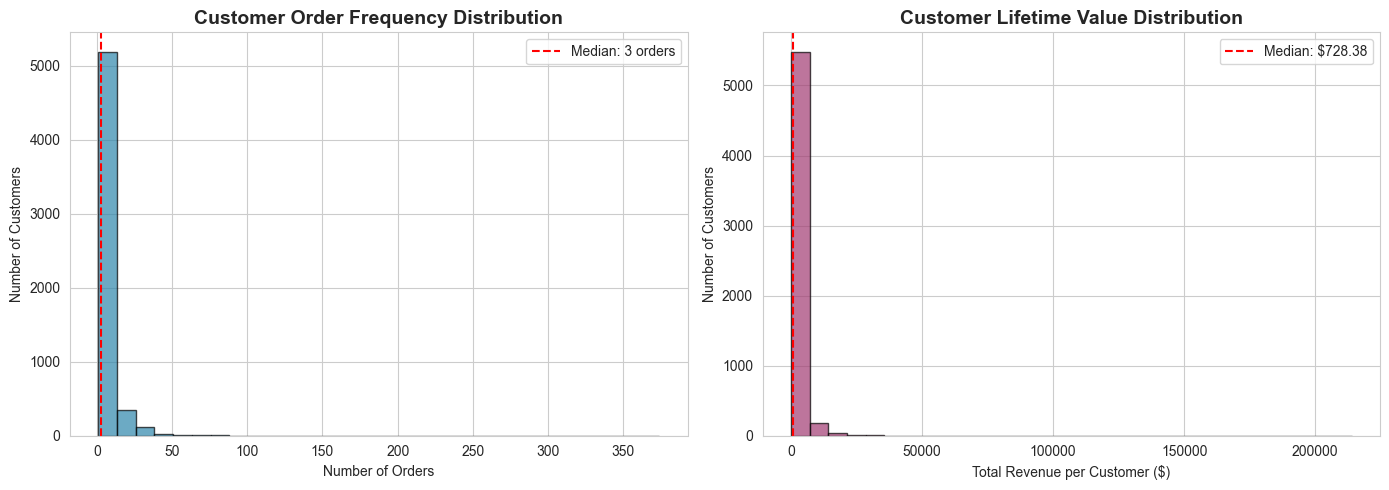


 Customer Segments:
• One-time Buyers: 1,607 (28.1%)
• Repeat Customers: 4,113 (71.9%)
• Loyal Customers (5+ orders): 2,055 (35.9%)

 Top 20% of customers account for:
• 68.4% of total revenue


In [ ]:
# Customer segmentation by order frequency
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Order frequency distribution
axes[0].hist(customer_summary['num_orders'], bins=30, edgecolor='black', alpha=0.7, color='#2E86AB')
axes[0].set_title('Customer Order Frequency Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Number of Customers')
axes[0].axvline(customer_summary['num_orders'].median(), color='red', linestyle='--',
                label=f'Median: {customer_summary["num_orders"].median():.0f} orders')
axes[0].legend()

# Customer lifetime value distribution
axes[1].hist(customer_summary['total_revenue'], bins=30, edgecolor='black', alpha=0.7, color='#A23B72')
axes[1].set_title('Customer Lifetime Value Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue per Customer ($)')
axes[1].set_ylabel('Number of Customers')
axes[1].axvline(customer_summary['total_revenue'].median(), color='red', linestyle='--',
                label=f'Median: ${customer_summary["total_revenue"].median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Customer segments
one_time = (customer_summary['num_orders'] == 1).sum()
repeat = (customer_summary['num_orders'] > 1).sum()
loyal = (customer_summary['num_orders'] >= 5).sum()

print("\n Customer Segments:")
print(f"• One-time Buyers: {one_time:,} ({one_time/len(customer_summary)*100:.1f}%)")
print(f"• Repeat Customers: {repeat:,} ({repeat/len(customer_summary)*100:.1f}%)")
print(f"• Loyal Customers (5+ orders): {loyal:,} ({loyal/len(customer_summary)*100:.1f}%)")

print("\n Top 20% of customers account for:")
top_20_pct = customer_summary.nlargest(int(len(customer_summary) * 0.2), 'total_revenue')
print(f"• {top_20_pct['total_revenue'].sum() / customer_summary['total_revenue'].sum() * 100:.1f}% of total revenue")


## GEOGRAPHIC ANALYSIS

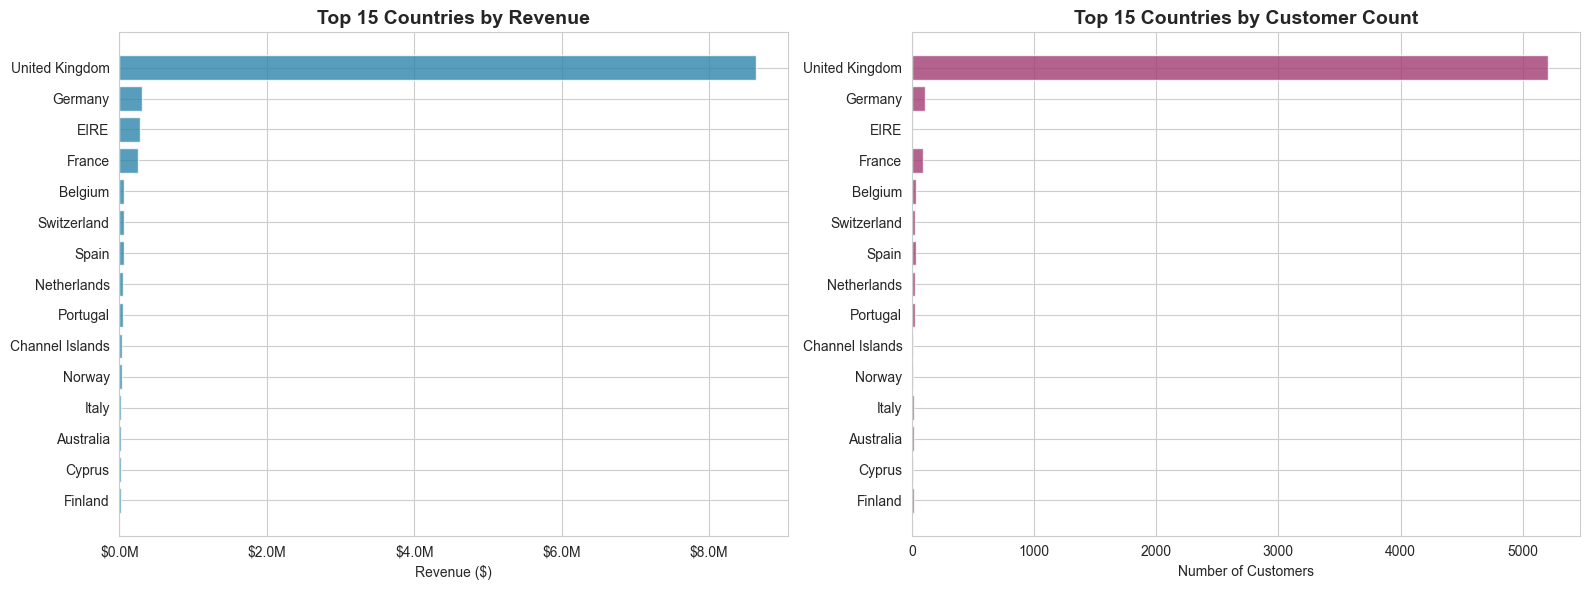


 Geographic Insights:

Top 5 Countries by Revenue:
       Country     Revenue  Revenue_Pct  Customers
United Kingdom 8633143.727    86.254985       5209
       Germany  299817.461     2.995520        106
          EIRE  280945.940     2.806971          3
        France  245448.760     2.452314         94
       Belgium   56368.720     0.563188         29

• Top country represents 86.3% of total revenue


In [18]:

# Revenue by country
country_stats = df.groupby('country').agg({
    'total_price': 'sum',
    'customer_id': 'nunique',
    'invoice_no': 'nunique'
}).reset_index()

country_stats.columns = ['Country', 'Revenue', 'Customers', 'Orders']
country_stats = country_stats.sort_values('Revenue', ascending=False)
country_stats['Revenue_Pct'] = country_stats['Revenue'] / country_stats['Revenue'].sum() * 100

# Top 15 countries
top_countries = country_stats.head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue by country
axes[0].barh(top_countries['Country'], top_countries['Revenue'], color='#2E86AB', alpha=0.8)
axes[0].set_title('Top 15 Countries by Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue ($)')
axes[0].invert_yaxis()
axes[0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Customers by country
axes[1].barh(top_countries['Country'], top_countries['Customers'], color='#A23B72', alpha=0.8)
axes[1].set_title('Top 15 Countries by Customer Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Customers')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n Geographic Insights:")
print(f"\nTop 5 Countries by Revenue:")
print(country_stats.head()[['Country', 'Revenue', 'Revenue_Pct', 'Customers']].to_string(index=False))
print(f"\n• Top country represents {country_stats.iloc[0]['Revenue_Pct']:.1f}% of total revenue")



## PRODUCT ANALYSIS

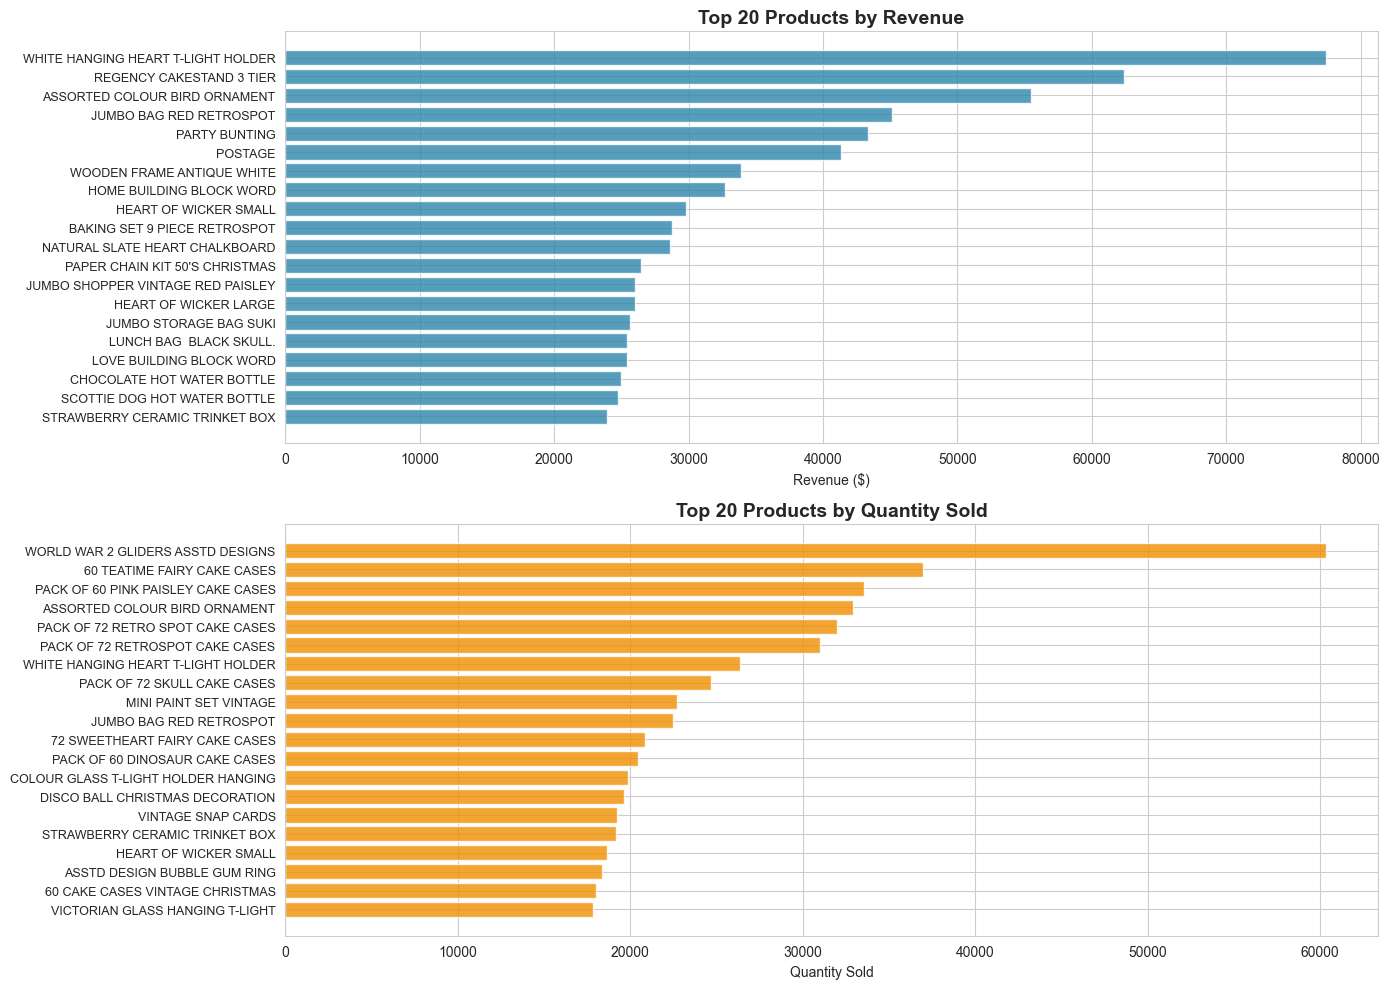


🛍️ Product Insights:
• Total Unique Products: 4,604
• Top Product Revenue: $77,392.44
• Top 10 products account for 4.5% of revenue


In [19]:
# Top products by revenue
product_stats = df.groupby(['stock_code', 'description']).agg({
    'total_price': 'sum',
    'quantity': 'sum',
    'invoice_no': 'nunique'
}).reset_index()

product_stats.columns = ['StockCode', 'Description', 'Revenue', 'Quantity', 'Orders']
product_stats = product_stats.sort_values('Revenue', ascending=False)

# Top 20 products
top_products = product_stats.head(20)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top products by revenue
axes[0].barh(range(len(top_products)), top_products['Revenue'], color='#2E86AB', alpha=0.8)
axes[0].set_yticks(range(len(top_products)))
axes[0].set_yticklabels([desc[:40] + '...' if len(desc) > 40 else desc 
                          for desc in top_products['Description']], fontsize=9)
axes[0].set_title('Top 20 Products by Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue ($)')
axes[0].invert_yaxis()

# Top products by quantity sold
top_qty = product_stats.nlargest(20, 'Quantity')
axes[1].barh(range(len(top_qty)), top_qty['Quantity'], color='#F18F01', alpha=0.8)
axes[1].set_yticks(range(len(top_qty)))
axes[1].set_yticklabels([desc[:40] + '...' if len(desc) > 40 else desc 
                          for desc in top_qty['Description']], fontsize=9)
axes[1].set_title('Top 20 Products by Quantity Sold', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Quantity Sold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n🛍️ Product Insights:")
print(f"• Total Unique Products: {df['stock_code'].nunique():,}")
print(f"• Top Product Revenue: ${product_stats.iloc[0]['Revenue']:,.2f}")
print(f"• Top 10 products account for {product_stats.head(10)['Revenue'].sum() / product_stats['Revenue'].sum() * 100:.1f}% of revenue")


In [34]:
get_product_details(df,'85123A')

📊 PRODUCT ANALYSIS: 85123A

Description: WHITE HANGING HEART T-LIGHT HOLDER
Total Orders: 3,846
Unique Customers: 1,355
Total Quantity Sold: 26,411
Total Revenue: $77,466.19
Average Price: $2.94
Average Quantity per Order: 6.4
Date Range: 2009-12-01 to 2011-12-09

Top 5 Countries:
  • United Kingdom: $74,241.84 (95.8%)
  • EIRE: $1,168.20 (1.5%)
  • Spain: $377.60 (0.5%)
  • Netherlands: $324.50 (0.4%)
  • Cyprus: $203.55 (0.3%)


{'stock_code': '85123A',
 'description': 'WHITE HANGING HEART T-LIGHT HOLDER',
 'total_orders': 3846,
 'unique_customers': 1355,
 'total_quantity': np.int64(26411),
 'total_revenue': np.float64(77466.19),
 'avg_price': np.float64(2.944894186329361),
 'avg_quantity_per_order': np.float64(6.424470931646801),
 'first_sale': Timestamp('2009-12-01 09:46:00'),
 'last_sale': Timestamp('2011-12-09 11:34:00')}

## TIME-BASED PATTERNS 

### DAY OF WEEK

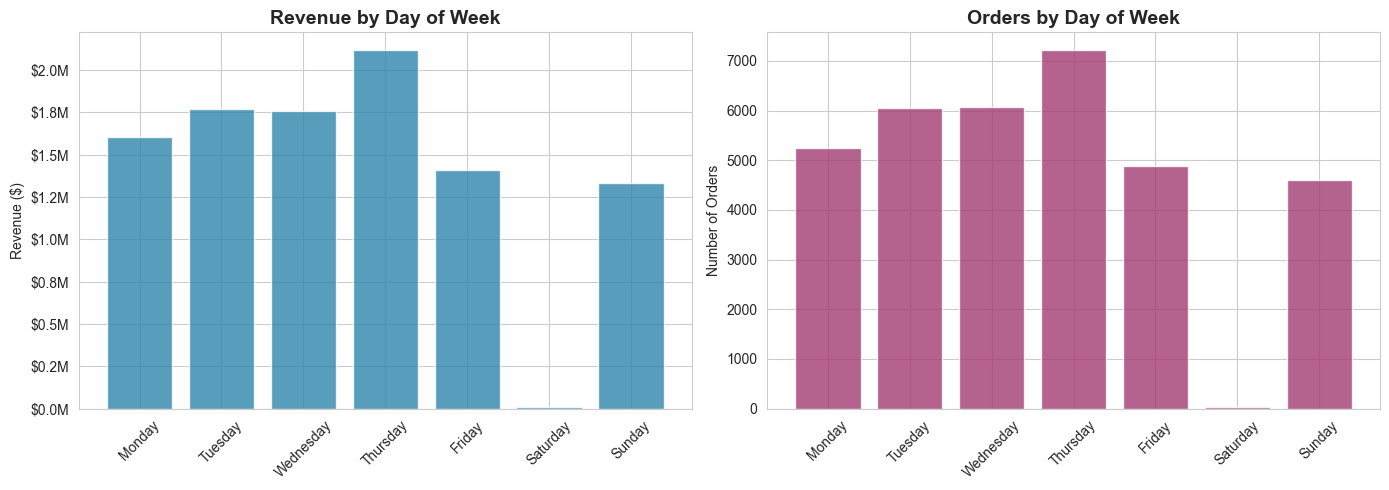


📅 Temporal Patterns:
• Busiest day: Thursday
• Slowest day: Saturday


In [20]:
# Day of week analysis
df['day_name'] = df['invoice_date'].dt.day_name()
df['hour'] = df['invoice_date'].dt.hour

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats = df.groupby('day_name').agg({
    'total_price': 'sum',
    'invoice_no': 'nunique'
}).reindex(day_order)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue by day of week
axes[0].bar(dow_stats.index, dow_stats['total_price'], color='#2E86AB', alpha=0.8)
axes[0].set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Orders by day of week
axes[1].bar(dow_stats.index, dow_stats['invoice_no'], color='#A23B72', alpha=0.8)
axes[1].set_title('Orders by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n📅 Temporal Patterns:")
print(f"• Busiest day: {dow_stats['total_price'].idxmax()}")
print(f"• Slowest day: {dow_stats['total_price'].idxmin()}")

### HOURLY

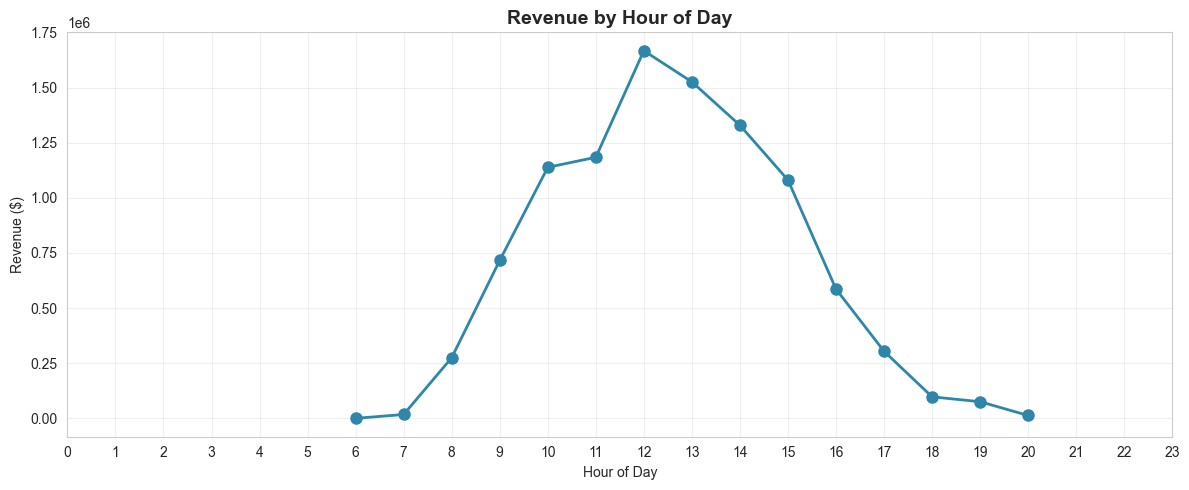


⏰ Peak shopping hour: 12:00


In [23]:
# Hourly patterns
# Convert Pandas objects (Index, Series) to NumPy arrays for safe plotting and type compatibility
hourly_stats = df.groupby('hour')['total_price'].sum()

plt.figure(figsize=(12, 5))
plt.plot(
    hourly_stats.index.to_numpy(),     # Convert Index to NumPy array
    hourly_stats.to_numpy(),           # Convert Series to NumPy array
    marker='o', linewidth=2, markersize=8, color='#2E86AB'
)
plt.title('Revenue by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print(f"\n⏰ Peak shopping hour: {hourly_stats.idxmax()}:00")


In [39]:
analyze_product_trend(df,'85123A', 'M')

,period,quantity,revenue,orders,customers
0,2009-12,1602,4645.56,211,171
1,2010-01,1322,3842.30,175,151
2,2010-02,1074,3163.50,143,135
3,2010-03,1350,3951.42,189,163
4,2010-04,1133,3320.95,159,137
5,2010-05,1318,3878.50,181,167
6,2010-06,1302,3833.70,184,167
7,2010-07,1070,3142.10,158,150
8,2010-08,1193,3512.15,171,156
9,2010-09,1213,3482.35,162,132


## CORRELATION ANALYSIS

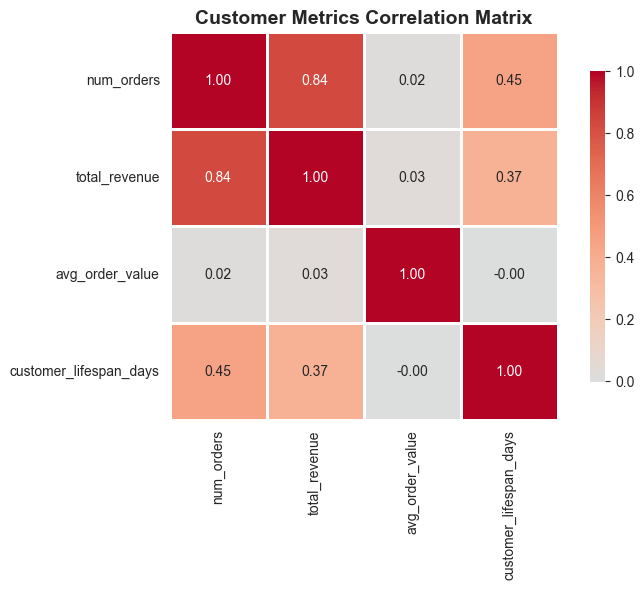


🔗 Key Correlations:
• Orders vs Revenue: 0.835
• Lifespan vs Revenue: 0.374


In [24]:
# Correlation heatmap for customer metrics
customer_corr = customer_summary[['num_orders', 'total_revenue', 'avg_order_value', 
                                   'customer_lifespan_days']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(customer_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Customer Metrics Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔗 Key Correlations:")
print(f"• Orders vs Revenue: {customer_corr.loc['num_orders', 'total_revenue']:.3f}")
print(f"• Lifespan vs Revenue: {customer_corr.loc['customer_lifespan_days', 'total_revenue']:.3f}")

## KEY FINDINGS SUMMARY

In [41]:

print("="*80)
print("🎯 KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n1. BUSINESS OVERVIEW:")
print(f"   • Dataset covers {(df['invoice_date'].max() - df['invoice_date'].min()).days} days of transactions")
print(f"   • Total revenue: ${df['total_price'].sum():,.2f}")
print(f"   • Active customers: {df['customer_id'].nunique():,}")
print(f"   • Average customer value: ${customer_summary['total_revenue'].mean():,.2f}")

print("\n2. CUSTOMER BEHAVIOR:")
print(f"   • {(customer_summary['num_orders'] == 1).sum() / len(customer_summary) * 100:.1f}% are one-time buyers")
print(f"   • Top 20% of customers generate {(customer_summary.nlargest(int(len(customer_summary)*0.2), 'total_revenue')['total_revenue'].sum() / customer_summary['total_revenue'].sum() * 100):.1f}% of revenue")
print(f"   • Average order frequency: {customer_summary['num_orders'].mean():.1f} orders per customer")
print(f"   • Median customer lifespan: {customer_summary['customer_lifespan_days'].median():.0f} days")

print("\n3. REVENUE PATTERNS:")
print(f"   • Peak revenue month: {monthly_revenue.loc[monthly_revenue['Revenue'].idxmax(), 'Month']}")
print(f"   • Busiest day: {dow_stats['total_price'].idxmax()}")
print(f"   • Peak shopping hour: {hourly_stats.idxmax()}:00")

print("\n4. GEOGRAPHIC INSIGHTS:")
print(f"   • Primary market: {country_stats.iloc[0]['Country']} ({country_stats.iloc[0]['Revenue_Pct']:.1f}% of revenue)")
print(f"   • Operating in {df['country'].nunique()} countries")

print("\n5. PRODUCT PERFORMANCE:")
print(f"   • Active product catalog: {df['stock_code'].nunique():,} SKUs")
print(f"   • Top 10 products account for {product_stats.head(10)['Revenue'].sum() / product_stats['Revenue'].sum() * 100:.1f}% of revenue")

print("\n6. OPPORTUNITIES FOR CLV & CHURN ANALYSIS:")
print(f"   • High one-time buyer rate suggests retention opportunity")
print(f"   • Strong revenue concentration in top customers")
print(f"   • Clear seasonal and weekly patterns to leverage")
print(f"   • Geographic expansion potential in underserved markets")


🎯 KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS

1. BUSINESS OVERVIEW:
   • Dataset covers 738 days of transactions
   • Total revenue: $10,008,863.47
   • Active customers: 5,720
   • Average customer value: $1,749.80

2. CUSTOMER BEHAVIOR:
   • 28.1% are one-time buyers
   • Top 20% of customers generate 68.4% of revenue
   • Average order frequency: 6.0 orders per customer
   • Median customer lifespan: 217 days

3. REVENUE PATTERNS:
   • Peak revenue month: 2011-11
   • Busiest day: Thursday
   • Peak shopping hour: 12:00

4. GEOGRAPHIC INSIGHTS:
   • Primary market: United Kingdom (86.3% of revenue)
   • Operating in 41 countries

5. PRODUCT PERFORMANCE:
   • Active product catalog: 4,604 SKUs
   • Top 10 products account for 4.5% of revenue

6. OPPORTUNITIES FOR CLV & CHURN ANALYSIS:
   • High one-time buyer rate suggests retention opportunity
   • Strong revenue concentration in top customers
   • Clear seasonal and weekly patterns to leverage
   • Geographic expansion potential i

In [42]:
# Close database connection
conn.close()
print("\n🔒 Database connection closed")


🔒 Database connection closed
